In [1]:
from sage.misc.prandom import randrange
from sage.matrix.berlekamp_massey import berlekamp_massey
from sage.plot.histogram import Histogram, histogram
import math, random, time
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# change these primes!!!
primes = [75329, 69857, 94309, 86209, 86413]
zetas = [randrange(2, p) for p in primes]  
Ms = [randrange(1, 10) * ((int(math.log2(p))+1)**2) for p in primes]    # O(n^2) where n is number of bits (18) here

In [3]:
primes

[75329, 69857, 94309, 86209, 86413]

In [4]:
zetas

[5823, 28841, 85777, 6819, 41950]

In [5]:
Ms

[289, 2601, 2023, 2023, 289]

In [6]:
# lc_hist 5 sets of 1000 samples LCs. Plot histograms from the same
lc_hist = []
for z,p,M in zip(zetas, primes, Ms):
    print(z,p,M)
    input_vec = np.random.randint(2,p,size=1000)
    lc_values = []
    for x in input_vec:
        y = Mod(x,p)
        S = []
        for i in range(math.ceil(M/2)*2):
            y = Mod(z,p) ** y
            S.append(y)
        lc_values.append(berlekamp_massey(S).degree())
    lc_hist.append(lc_values)

5823 75329 289
28841 69857 2601
85777 94309 2023
6819 86209 2023
41950 86413 289


In [7]:
for lc in lc_hist:
    print(min(lc), max(lc))

12 145
304 1301
1 70
273 1012
3 145


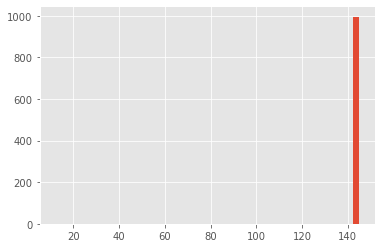

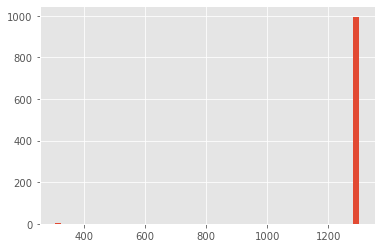

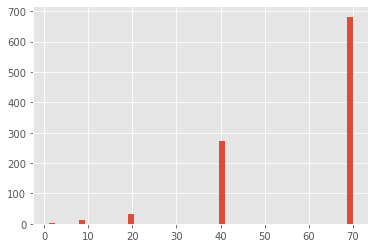

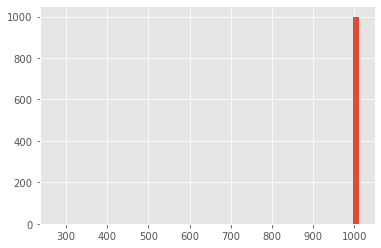

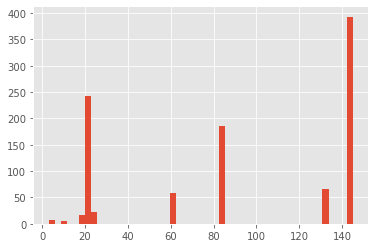

In [9]:
for lc in lc_hist:
    plt.style.use('ggplot')
    plt.hist(lc, bins=50)
    plt.show()